The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Reading img...
Loading /home/miguel/Projects/uni/data/smlm_3d/20220607_nanoruler_miguel/B4/FOV6/storm_1500nm_1/storm_1500nm_1_MMStack_Default.ome.tif
Loading /home/miguel/Projects/uni/data/smlm_3d/20220607_nanoruler_miguel/B4/FOV6/storm_1500nm_1/storm_1500nm_1_MMStack_Default.csv


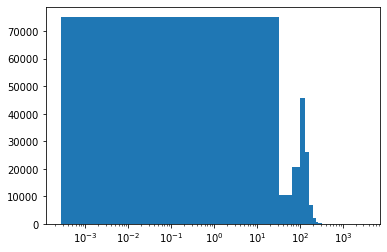

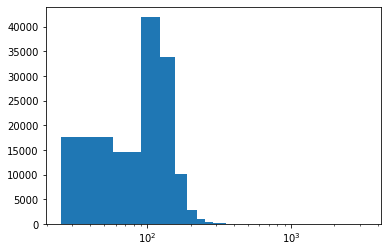

123234 emitters before filtering


  0%|          | 164/117121 [00:00<01:11, 1630.77it/s]

117121 emitters after borders


100%|██████████| 117121/117121 [01:11<00:00, 1638.56it/s]


Clustering emitters...
Initial: N images 117121 - DF: (117121, 10)
Final: images 479 - DF: (479, 12)


In [6]:
%load_ext autoreload
%autoreload 2
from final_project.smlm_3d.config.datasets import dataset_configs
from final_project.smlm_3d.data.datasets import StormDataset, ExperimentalDataSet
import matplotlib.pyplot as plt
dataset ='20220607_nanoruler_miguel'

cfg = dataset_configs[dataset]['storm_slide_1500']
ds = StormDataset(cfg, normalize_psf=True, lazy=True)
plt.hist(ds.csv_data['sigma [nm]'], bins=100)
plt.xscale('log')
plt.show()
ds.csv_data = ds.csv_data[ds.csv_data['sigma [nm]'] > 25]
plt.hist(ds.csv_data['sigma [nm]'], bins=100)
plt.xscale('log')
plt.show()
ds.prepare_data()



Rows 48 Cols 10 n_spaces 480 n_psfs 479


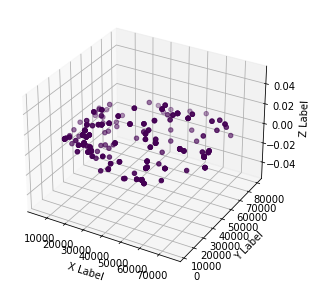

In [7]:
from final_project.smlm_3d.data.visualise import grid_psfs, scatter_3d
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [300, 300]
psfs = ds.data[0].squeeze()
plt.imshow(grid_psfs(psfs))
plt.show()


plt.rcParams['figure.figsize'] = [5, 5]
scatter_3d(ds.xyz_coords)


In [11]:
import pandas as pd
import numpy as np

# ds.csv_data = pd.read_csv('/home/miguel/Projects/uni/data/smlm_3d/20220408_nup96_tubulin_simultaneous_STORM/Miguel_sphere_500_frames_every_2um/concat/concat.csv')
# ds.csv_data = ds.csv_data[(ds.csv_data['x [nm]'] < 20000) & (ds.csv_data['y [nm]'] < 20000)]
# ds.csv_data = ds.csv_data[(ds.csv_data['x [nm]'] > 10000) & (ds.csv_data['y [nm]'] > 10000)]


ds.filter_emitters_proximity = False
ds.prepare_data()
ds.csv_data['id'] = np.arange(0, ds.csv_data.shape[0])


 15%|█▌        | 143/928 [00:00<00:00, 1423.79it/s]

928 emitters before filtering
928 emitters after borders


100%|██████████| 928/928 [00:00<00:00, 1206.35it/s]


Clustering emitters...
Initial: N images 928 - DF: (928, 12)
Final: images 1 - DF: (1, 12)


In [ ]:
# import pandas as pd
# from scipy.spatial.distance import cdist
# import numpy as np
# from tqdm import tqdm
# from sklearn.cluster import DBSCAN

# df = ds.csv_data


# print(df.shape) 
# all_xy = df[['x [nm]', 'y [nm]']].to_numpy()

# neighbour_radius = 2.5
# max_off_frames = 10

# cluster = DBSCAN(eps=neighbour_radius, min_samples=2).fit(all_xy)

# df['group'] = cluster.labels_

# for group_id in sorted(set(df['group'])):
#     if group_id == -1:
#         continue
#     frames = df[df['group'] == group_id]['frame']
#     if len(set(frames)) != len(frames):
#         print(sorted(frames))

# print(len(set(df['group'])))
# # group_id = 0

# # df['group'] = -1

# # for i in tqdm(range(df.shape[0])):
# #     emitter = df.iloc[i]
# #     if emitter['group'] != -1:
# #         continue
# #     xy = emitter[['x [nm]', 'y [nm]']].to_numpy()[np.newaxis, :]
    
# #     all_distances = cdist(all_xy, xy).squeeze()
# #     dists = np.argwhere(cdist(all_xy, xy).squeeze() <= neighbour_radius).flatten()
# #     df_ids = df.id.to_numpy()[dists]
# #     current_frame = emitter['frame']
# #     if dists.size == 0:
# #         continue
# #     df.loc[df.id.isin(df_ids), 'group'] = group_id
# #     group_id += 1


In [ ]:
# from collections import Counter

# group_sizes = Counter(df['group']).items()
# group_sizes = sorted(group_sizes, key=lambda x: x[1], reverse=True)
# print(group_sizes)
# group_ids = [x[0] for x in group_sizes]

# sub_df = df[df['group'].isin(group_ids)]
# print(df.shape)
# print(sub_df.shape)

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# sub_df['group'] = sub_df['group'].astype(str)
# sub_df = sub_df[sub_df['group'] != '-1']

# plt.rcParams['figure.figsize'] = [30, 10]
# sns.scatterplot(x='frame', y='x [nm]', hue='group', data=sub_df)
# plt.show()
# # print(len(set(sub_df['group'])))
# # for group_id in sorted(set(df['group'])):
# #     if group_id == '-1':
# #         continue
# #     group_coords = sub_df[sub_df['group'] == group_id][['x [nm]', 'y [nm]']].to_numpy()
# #     plt.scatter(group_coords[:, 0], group_coords[:, 1])
    

# # plt.xlabel('frame')
# # plt.ylabel('x [nm]')
# # plt.show()

In [ ]:
from final_project.smlm_3d.data.visualise import grid_psfs
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [50, 50]
plt.imshow(grid_psfs(ds.data[0][0:1000].squeeze()))
plt.show()

In [ ]:
print(ds.data[0].shape)
print(df.shape)
print(df.index.max())

plt.rcParams['figure.figsize'] = [5, 5]

rows = []
for group_id in group_ids[0:50]:
    if group_id == -1:
        continue
    sub_df = df[df['group'] == group_id]
    imgs = []
    imgs = ds.data[0][sub_df['id'].to_numpy()].squeeze()
    coords = ds.data[1][sub_df['id'].to_numpy()].squeeze()
    
    mean_row = sub_df.mean(axis=0).to_dict()
    mean_row['frame'] = list(sub_df['frame'])
#     for idx in list(sub_df['id'].to_numpy()):
#         imgs.append(ds.data[0][idx].squeeze())
#         print(list(sub_df.loc[idx][['x [nm]', 'y [nm]']]))
    rows.append(mean_row)
    plt.imshow(grid_psfs(imgs))
    plt.show()
    
    mean_img = np.mean(np.array(imgs).squeeze(), axis=0)
    mean_img = ds.normalise_image(mean_img)
    
    plt.imshow(mean_img)
    plt.show()
    print(' \n\n')
    break
    
df2 = pd.DataFrame.from_records(rows)
print(df2)